## Nome: Leonardo Valadão. NUSP: 10299437

# 3º Programa: Integração Numérica

### Disciplina: Cálculo Numérico com Aplicações em Física. Docente: Arnaldo Gammal.

**1) Construa um programa em *precisão simples* que calcule numericamente a integral $I=\int_{0}^{1}(7-5x^4)dx$ usando o método de Trapézios.**

**a) Faça uma tabela na forma**

![title](./table.png)

**onde $N=2^p$ é o número de intervalos, $erro=|I_{num}-I|$ e $I$ é o valor analítico da integral.**

***===ENTREGAR PROGRAMA (SÓ EM PRECISÃO SIMPLES)===***

Para saber $I$, vamos calcular a integral analiticamente.<br>
$\int_0^1 (7-5x^4)dx = [7x-x^5]_0^1 = 6$ <br>
Logo $I=6$.

O Método de Trapézios diz que nossa integral será: <br>
$I_{num} = \Sigma_{i=1}^n h_i \frac{f(x_i) + f(x_{i+1})}{2} = \frac{h}{2}[f_1+2f_2+2f_3...]$

Nossa função é $f(x) = 7-5x^4$

In [1]:
# Definir método
def trapezio(f, N, a, b):
    '''f: Função a ser integrada; 
    N: Nº de intervalos; 
    a,b: Intervalo (a,b) a ser integrado;
    prec: Precisão, 's' para simples e 'd' para dupla; '''
    
    # Região a ser calculada e tamanho de passos
    reg = np.single(b-a)
    h = np.single(reg/N)
    
    # Lista de bases do trapézio
    lx = list(np.arange(a,b,h)+h)
    
    # Cálculo do método
    soma = np.single(f(lx.pop(0)))
    for x in lx:
        soma += np.single(2*f(x))
    
    T = np.single((h/2) * soma)
    return T

In [2]:
# Definir funcao
def func(x):
    return 7-5*x**4

# Calcular p de 1 a 25 e fazer tabela
import numpy as np
p = list(np.arange(1,26))

# Iterações
lp = []
lerro = []
for p in p:
    N = np.single(2**p)
    a = np.single(0)
    b = np.single(1)
    I = np.single(6)
    Inum = np.single(trapezio(func, N, 0, 1))
    erro = np.single(np.abs(Inum-I))
    # Adicionar à lista para gráfico posterior
    lp.append(p)
    lerro.append(erro)
    # Imprimir tabela
    print('p: {:.0f} | N: {:.0f} | Inum: {:.8f} | Erro: {:.8f} '.format(p, N, Inum, erro))

p: 1 | N: 2 | Inum: 2.67187500 | Erro: 3.32812500 
p: 2 | N: 4 | Inum: 4.39892578 | Erro: 1.60107422 
p: 3 | N: 8 | Inum: 5.22407532 | Erro: 0.77592468 
p: 4 | N: 16 | Inum: 5.61849451 | Erro: 0.38150549 
p: 5 | N: 32 | Inum: 5.81087303 | Erro: 0.18912697 
p: 6 | N: 64 | Inum: 5.90584230 | Erro: 0.09415770 
p: 7 | N: 128 | Inum: 5.95302296 | Erro: 0.04697704 
p: 8 | N: 256 | Inum: 5.97653770 | Erro: 0.02346230 
p: 9 | N: 512 | Inum: 5.98827314 | Erro: 0.01172686 
p: 10 | N: 1024 | Inum: 5.99413872 | Erro: 0.00586128 
p: 11 | N: 2048 | Inum: 5.99708080 | Erro: 0.00291920 
p: 12 | N: 4096 | Inum: 5.99852896 | Erro: 0.00147104 
p: 13 | N: 8192 | Inum: 5.99926567 | Erro: 0.00073433 
p: 14 | N: 16384 | Inum: 5.99963951 | Erro: 0.00036049 
p: 15 | N: 32768 | Inum: 5.99980688 | Erro: 0.00019312 
p: 16 | N: 65536 | Inum: 5.99999857 | Erro: 0.00000143 
p: 17 | N: 131072 | Inum: 6.00023270 | Erro: 0.00023270 
p: 18 | N: 262144 | Inum: 5.99949551 | Erro: 0.00050449 
p: 19 | N: 524288 | Inum: 6.00

**b) Faça um gráfico de $log_{10}erro$ em função de $p$, eliminando os pontos em que eventualmente $erro=0$. Repita os cálculos em *dupla precisão* e coloque os resultados no mesmo gráfico. Indique nos gráficos os efeitos do erro de Truncamento do método e erro de "Roundoff" da representação de ponto flutuante. Determine a partir do gráfico a ordem de grandeza do erro do método empregado e "Roundoff" e compare com os teóricos $O(h^2)$ e $O(\sqrt{N})$, respectivamente. Explique o que está acontecendo à medida que se aumenta $N$.**

***===ENTREGAR TABELA IMPRESSA PRECISÃO SIMPLES===***

In [3]:
# Montar tabela para melhor visualizar dados e retirar pontos onde erro = 0
import pandas as pd
df = pd.DataFrame(columns=['p', 'erro'])
df['p'] = lp
df['erro'] = lerro
df = df[df['erro']!=0]

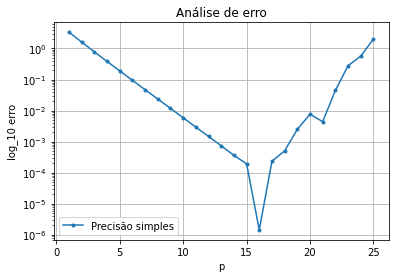

In [4]:
# Fazer gráfico
import matplotlib.pyplot as plt

plt.plot(df['p'], df['erro'], marker='.', label='Precisão simples')

plt.title('Análise de erro')
plt.xlabel('p')
plt.ylabel('log_10 erro')
plt.yscale('log')
plt.grid()
plt.legend()

plt.show()

In [5]:
# Repetir cálculos com dupla precisão
def trapezio2(f, N, a, b):
    reg = np.double(b-a)
    h = np.double(reg/N)
    
    # Lista de bases do trapézio
    lx = list(np.arange(a,b,h)+h)
    
    # Cálculo do método
    soma = np.double(f(lx.pop(0)))
    for x in lx:
        soma += np.double(2*f(x))
    
    T = np.double((h/2) * soma)
    return T

p = list(np.arange(1,26))

# Iterações
lp2=[]
lerro2=[]
for p in p:
    N = np.double(2**p)
    a = np.double(0)
    b = np.double(1)
    I = np.double(6)
    Inum = np.double(trapezio2(func, N, 0, 1))
    erro = np.double(np.abs(Inum-I))
    # Adicionar à lista para gráfico posterior
    lp2.append(p)
    lerro2.append(erro)
    # Imprimir tabela
    print('p: {:.0f} | N: {:.0f} | Inum: {:.16f} | Erro: {:.16f} '.format(p, N, Inum, erro))

p: 1 | N: 2 | Inum: 2.6718750000000000 | Erro: 3.3281250000000000 
p: 2 | N: 4 | Inum: 4.3989257812500000 | Erro: 1.6010742187500000 
p: 3 | N: 8 | Inum: 5.2240753173828125 | Erro: 0.7759246826171875 
p: 4 | N: 16 | Inum: 5.6184945106506348 | Erro: 0.3815054893493652 
p: 5 | N: 32 | Inum: 5.8108726292848587 | Erro: 0.1891273707151413 
p: 6 | N: 64 | Inum: 5.9058431112207472 | Erro: 0.0941568887792528 
p: 7 | N: 128 | Inum: 5.9530232754332246 | Erro: 0.0469767245667754 
p: 8 | N: 256 | Inum: 5.9765370687259747 | Erro: 0.0234629312740253 
p: 9 | N: 512 | Inum: 5.9882748921737203 | Erro: 0.0117251078262797 
p: 10 | N: 1024 | Inum: 5.9941390355429593 | Erro: 0.0058609644570407 
p: 11 | N: 2048 | Inum: 5.9970699151357074 | Erro: 0.0029300848642926 
p: 12 | N: 4096 | Inum: 5.9985350569089517 | Erro: 0.0014649430910483 
p: 13 | N: 8192 | Inum: 5.9992675532896698 | Erro: 0.0007324467103302 
p: 14 | N: 16384 | Inum: 5.9996337828536879 | Erro: 0.0003662171463121 
p: 15 | N: 32768 | Inum: 5.99981

In [6]:
# Montar tabela pra visualização
df2 = pd.DataFrame(columns=['p', 'erro'])
df2['p'] = lp2
df2['erro'] = lerro2
df2 = df2[df2['erro']!=0]

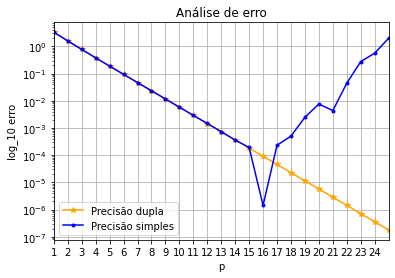

In [10]:
# Fazer gráfico
import matplotlib.pyplot as plt

plt.plot(df2['p'], df2['erro'], marker='*', color='orange', label='Precisão dupla')
plt.plot(df['p'], df['erro'], marker='.', color='blue', label='Precisão simples')

plt.title('Análise de erro')
plt.xlabel('p')
plt.ylabel('log_10 erro')
plt.yscale('log')
plt.xlim(1,25)
plt.xticks(np.arange(1,25,1))
plt.legend()
plt.grid()

plt.show()

No gráfico acima, no caso de precisão simples, vemos que no ponto $p=16$ houve erro de truncamento, ou seja, erro de parada do método. Isso é evidenciado pela queda brusca do erro, que teoricamente tem aspecto linear na forma $O(h^\alpha)$. Isto quer dizer que o método parou abruptamente de forma que o erro ficou menor "de repente", talvez por extrapolação. Mas por que o erro aumenta depois? Isto acontece por causa do erro de roundoff, que é o "erro de arredondamento". Conforme o método vai arredondando as somas, ele vai acumulando um erro conforme $N$ aumenta, e por isso o erro vai aumentar. <br>
Uma vez que na precisão dupla temos mais casas decimais a serem calculadas, não temos o mesmo erro que na precisão simples até o $N$ considerado. Se continuarmos calculando para $p$ maiores, iremos eventualmente ver os mesmos erros na precisão dupla.

**2) O período de um pêndulo simples para ângulos pequenos $(\theta_0<10º)$ é dado aproximadamente por $T_{Galileu}=2\pi\sqrt{l/g}$. Para ângulos apreciáveis e desprezando a resistência do ar, a expressão para o período é**

<center>
$T=4\sqrt{\frac{l}{g}} \int_{0}^{\pi/2} \frac{1}{\sqrt{1-k^2sin^2\xi}}$
</center>

**onde $k=sin(\theta_0/2)$ e $\theta_0$ é o ângulo inicial em *radianos*. Com o método de Simpson, calcule a integral acima e construa uma tabela com 10 valores de $\theta_0$ e $T$, com $\theta_0$ variando no intervalo $[0,\pi)$. Aumente bem o número de valores $\theta_0$ e faça um gráfico de $T/T_{Galileu}$ em função de $\theta_0$. Use o número de divisões trapezoidais que achar necessário.**

***===ENTREGAR PROGRAMA + TABELA + GRÁFICO===***

**3) Cálculo da área sob a curva $y=x^4$, $0<x<1$, usando o método de Monte-Carlo.**

**a) Construa primeiro uma rotina random($Z_i$) que retorne números aleatórios uniformemente distribuídos por "linear congruential generator" com $Z_{i+1}=(a Z_i+c) mod m$, onde $a=1103515245$, $c=12345$, $m=2147483647$ e $U_i=Z_{i+1}/m$. $U_i$ é o número entre 0 e 1 gerado. Use seu número USP como semente inicial $Z_0$.**

***===ENTREGAR PROGRAMA===***

**b) Faça UMA tentativa jogando 100 pontos $(x,y)$, $0<x<1$ e $0<y<1$ aleatoriamente e determine o valor da área sob a curva usando**

<center>
    $I \approx\frac{número de pontos dentro}{número total de pontos}$
</center>

***===ENTREGAR PROGRAMA===***

**c) Faça um estudo com diferentes números de tentativas $N_t=2,4,8,16,...,131072$ (cada tentativa joga 100 pontos aleatórios). Construa a seguinte tabela**

![title](./table2.png)

**onde $I_m$ é o valor médio da integral, $\sigma$ é o desvio padrão e $\sigma_m$ é o desvio padrão da média, dados pelas fórmulas:**

<center>
$I_m = \frac{1}{N_t}\Sigma_{i=1}^{N_t} I_i$
</center>

<center>
$\sigma^2=\frac{1}{N_t-1}\Sigma_{i=1}^{N_t}(I_i-I_m)^2
$
</center>

**e $\sigma_m=\sigma/\sqrt{N_t}$.**

**O valor da integral é dado por $I_m \pm \sigma_m$.**

***===ENTREGAR TABELA===***